### **Librerias y carga del data set**

In [1]:
# importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# carga del dataset
df = pd.read_excel('../data/tiempos.xlsx')

In [4]:
# vista preliminar del dataframe
df.head()

,Equipment,Date and Time,Payload Weight (t),Fuel Burned (L),Total Cycle Time (hh:mm:ss),Total Distance Travelled (km),Empty Travel Time (hh:mm:ss),Empty Travel Distance (km),Empty Stop Time (hh:mm:ss),Load Time (hh:mm:ss),Load Stop Time (hh:mm:ss),Load Travel Time (hh:mm:ss),Load Travel Distance (km),"Start Latitude, Longitude","Destination Latitude, Longitude"
0,M02782,09/30/2025 07:28:12,224.7,130.12,00:32:56,6.7,00:09:40,2.7,00:01:56,00:01:17,00:01:47,00:18:15,4.0,"9.532689,-73.49631","9.539351,-73.47628"
1,M02782,09/30/2025 07:00:01,196.5,51.10,00:28:11,4.9,00:10:00,2.5,00:03:42,00:03:46,00:00:56,00:09:46,2.4,"9.535113,-73.495636","9.548589,-73.491776"
2,M02782,09/30/2025 06:27:18,214.3,67.66,00:32:36,6.8,00:11:50,3.5,00:04:11,00:02:17,00:01:29,00:12:48,3.3,"9.524642,-73.4942","9.547827,-73.492805"
3,M02782,09/30/2025 05:42:49,178.4,79.97,00:44:29,7.5,00:14:26,3.5,00:03:49,00:01:56,00:06:39,00:17:37,4.0,"9.546379,-73.492355","9.546379,-73.492355"
4,M02782,09/30/2025 04:42:05,205.2,72.40,00:39:53,6.6,00:15:37,3.3,00:01:12,00:02:30,00:02:53,00:17:40,3.3,"9.524824,-73.494286","9.548149,-73.49264"


In [5]:
df.columns = [
    'Equipment',
    'DateTime',
    'Payload',
    'FuelBurned',
    'CycleTime',
    'DistanceTravelled',
    'EmptyTravelTime',
    'EmptyTravelDistance',
    'EmptyStopTime',
    'LoadTime',
    'LoadStopTime',
    'LoadTravelTime',
    'LoadTravelDistance',
    'StartLatLong',
    'DestinationLatLong'
]

### **Evaluación y revisión preliminar del dataframe**

In [6]:
# Evaluación de completitud
missing_values = df.isnull().sum()

missing_values_df = pd.DataFrame(missing_values, columns=['Missing Values'])
missing_values_df

,Missing Values
Equipment,0
DateTime,0
Payload,0
FuelBurned,0
CycleTime,0
DistanceTravelled,0
EmptyTravelTime,0
EmptyTravelDistance,0
EmptyStopTime,0
LoadTime,0


In [7]:
# Verificación de los tipos de datos de las columnas del df
df.dtypes

Equipment               object
DateTime                object
Payload                float64
FuelBurned             float64
CycleTime               object
DistanceTravelled      float64
EmptyTravelTime         object
EmptyTravelDistance     object
EmptyStopTime           object
LoadTime                object
LoadStopTime            object
LoadTravelTime          object
LoadTravelDistance     float64
StartLatLong            object
DestinationLatLong      object
dtype: object

In [8]:
df.head()


,Equipment,DateTime,Payload,FuelBurned,CycleTime,DistanceTravelled,EmptyTravelTime,EmptyTravelDistance,EmptyStopTime,LoadTime,LoadStopTime,LoadTravelTime,LoadTravelDistance,StartLatLong,DestinationLatLong
0,M02782,09/30/2025 07:28:12,224.7,130.12,00:32:56,6.7,00:09:40,2.7,00:01:56,00:01:17,00:01:47,00:18:15,4.0,"9.532689,-73.49631","9.539351,-73.47628"
1,M02782,09/30/2025 07:00:01,196.5,51.10,00:28:11,4.9,00:10:00,2.5,00:03:42,00:03:46,00:00:56,00:09:46,2.4,"9.535113,-73.495636","9.548589,-73.491776"
2,M02782,09/30/2025 06:27:18,214.3,67.66,00:32:36,6.8,00:11:50,3.5,00:04:11,00:02:17,00:01:29,00:12:48,3.3,"9.524642,-73.4942","9.547827,-73.492805"
3,M02782,09/30/2025 05:42:49,178.4,79.97,00:44:29,7.5,00:14:26,3.5,00:03:49,00:01:56,00:06:39,00:17:37,4.0,"9.546379,-73.492355","9.546379,-73.492355"
4,M02782,09/30/2025 04:42:05,205.2,72.40,00:39:53,6.6,00:15:37,3.3,00:01:12,00:02:30,00:02:53,00:17:40,3.3,"9.524824,-73.494286","9.548149,-73.49264"


### **Limpieza y normalización de los datos**

In [9]:
# Quitar los dos primeros caracteres 'M0' del identificador del camión
df['Equipment'] = df['Equipment'].str.replace('M0', '', regex=False)

# Convertir la columna DateTime a tipo fecha y hora
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%m/%d/%Y %H:%M:%S', errors='coerce')

# Función para convertir los tiempos 'hh:mm:ss' a minutos decimales
def time_to_minutes(t):
    try:
        h, m, s = map(int, t.split(':'))
        return round(h * 60 + m + s / 60,2)
    except:
        return None

# Aplicar la conversión a las columnas de tiempo
cols_time = ['CycleTime', 'EmptyTravelTime', 'EmptyStopTime',
             'LoadTime', 'LoadStopTime', 'LoadTravelTime']

for col in cols_time:
    df[col] = df[col].astype(str).apply(time_to_minutes)

# Revisar cambios
df.head(3)

,Equipment,DateTime,Payload,FuelBurned,CycleTime,DistanceTravelled,EmptyTravelTime,EmptyTravelDistance,EmptyStopTime,LoadTime,LoadStopTime,LoadTravelTime,LoadTravelDistance,StartLatLong,DestinationLatLong
0,2782,2025-09-30 07:28:12,224.7,130.12,32.93,6.7,9.67,2.7,1.93,1.28,1.78,18.25,4.0,"9.532689,-73.49631","9.539351,-73.47628"
1,2782,2025-09-30 07:00:01,196.5,51.10,28.18,4.9,10.00,2.5,3.70,3.77,0.93,9.77,2.4,"9.535113,-73.495636","9.548589,-73.491776"
2,2782,2025-09-30 06:27:18,214.3,67.66,32.60,6.8,11.83,3.5,4.18,2.28,1.48,12.80,3.3,"9.524642,-73.4942","9.547827,-73.492805"


In [10]:
# Agregamos columna "Shift" para indicar el turno

# Extraer la hora de la columna DateTime
df['Hour'] = df['DateTime'].dt.hour

# Asignar el turno según el rango horario
df['Shift'] = df['Hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

# Confirmar que la columna fue agregada correctamente
df[['DateTime', 'Hour', 'Shift']].head()

# Mover 'Hour' y 'Shift' para que queden justo después de 'DateTime'
# Obtener el orden actual
cols = list(df.columns)

# Identificar posición actual de 'DateTime'
idx = cols.index('DateTime')

# Crear nuevo orden
new_order = cols[:idx+1] + ['Hour', 'Shift'] + [c for c in cols if c not in ['Hour', 'Shift'] and c not in cols[:idx+1]]

# Reordenar el DataFrame
df = df[new_order]

# Verificar que el orden quedó correcto
df.head()



,Equipment,DateTime,Hour,Shift,Payload,FuelBurned,CycleTime,DistanceTravelled,EmptyTravelTime,EmptyTravelDistance,EmptyStopTime,LoadTime,LoadStopTime,LoadTravelTime,LoadTravelDistance,StartLatLong,DestinationLatLong
0,2782,2025-09-30 07:28:12,7,Day,224.7,130.12,32.93,6.7,9.67,2.7,1.93,1.28,1.78,18.25,4.0,"9.532689,-73.49631","9.539351,-73.47628"
1,2782,2025-09-30 07:00:01,7,Day,196.5,51.10,28.18,4.9,10.00,2.5,3.70,3.77,0.93,9.77,2.4,"9.535113,-73.495636","9.548589,-73.491776"
2,2782,2025-09-30 06:27:18,6,Day,214.3,67.66,32.60,6.8,11.83,3.5,4.18,2.28,1.48,12.80,3.3,"9.524642,-73.4942","9.547827,-73.492805"
3,2782,2025-09-30 05:42:49,5,Night,178.4,79.97,44.48,7.5,14.43,3.5,3.82,1.93,6.65,17.62,4.0,"9.546379,-73.492355","9.546379,-73.492355"
4,2782,2025-09-30 04:42:05,4,Night,205.2,72.40,39.88,6.6,15.62,3.3,1.20,2.50,2.88,17.67,3.3,"9.524824,-73.494286","9.548149,-73.49264"


In [11]:
# Ultima verificacion del dataframe antes de EDA

df.isnull().sum()

Equipment              0
DateTime               0
Hour                   0
Shift                  0
Payload                0
FuelBurned             0
CycleTime              0
DistanceTravelled      0
EmptyTravelTime        5
EmptyTravelDistance    0
EmptyStopTime          0
LoadTime               0
LoadStopTime           0
LoadTravelTime         0
LoadTravelDistance     0
StartLatLong           0
DestinationLatLong     0
dtype: int64

In [12]:
# Eliminar filas con nulos EmptyTravelTime
df = df.dropna(subset=['EmptyTravelTime'])

### **EDA**

#####**Estructura del Dataframe**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3348 entries, 0 to 3352
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Equipment            3348 non-null   object        
 1   DateTime             3348 non-null   datetime64[ns]
 2   Hour                 3348 non-null   int32         
 3   Shift                3348 non-null   object        
 4   Payload              3348 non-null   float64       
 5   FuelBurned           3348 non-null   float64       
 6   CycleTime            3348 non-null   float64       
 7   DistanceTravelled    3348 non-null   float64       
 8   EmptyTravelTime      3348 non-null   float64       
 9   EmptyTravelDistance  3348 non-null   object        
 10  EmptyStopTime        3348 non-null   float64       
 11  LoadTime             3348 non-null   float64       
 12  LoadStopTime         3348 non-null   float64       
 13  LoadTravelTime       3348 non-null   f

In [14]:
df.isnull().sum()

Equipment              0
DateTime               0
Hour                   0
Shift                  0
Payload                0
FuelBurned             0
CycleTime              0
DistanceTravelled      0
EmptyTravelTime        0
EmptyTravelDistance    0
EmptyStopTime          0
LoadTime               0
LoadStopTime           0
LoadTravelTime         0
LoadTravelDistance     0
StartLatLong           0
DestinationLatLong     0
dtype: int64

El dataframe ha quedado limpio y listo para el análisis!

##### **Estadisticas básicas descriptivas (General)**

In [15]:
# Calcular estadísticas descriptivas por camión
cols_time = ['CycleTime', 'EmptyTravelTime', 'EmptyStopTime',
             'LoadTime', 'LoadStopTime', 'LoadTravelTime']

# Media, desviación estándar, mínimo y máximo
desc_camion = df.groupby('Equipment')[cols_time].agg(['mean','std','min','max']).round(2)
desc_camion

CycleTime                       EmptyTravelTime                      \
               mean    std    min     max            mean   std   min     max   
Equipment                                                                       
2780          32.47   9.96   9.73  113.05           11.01  4.82  0.25   84.27   
2781          31.59   9.58  11.28  150.72           10.94  5.15  0.62  112.40   
2782          33.08  10.43   6.72   93.40           11.39  4.42  0.80   55.10   
2784          32.42   9.99   6.72  108.70           11.00  4.33  0.48   73.38   

          EmptyStopTime        ... LoadTime        LoadStopTime              \
                   mean   std  ...      min    max         mean   std   min   
Equipment                      ...                                            
2780               3.53  4.46  ...     0.83  22.58         1.77  2.39  0.72   
2781               3.45  4.25  ...     0.78   8.35         1.62  2.31  0.67   
2782               3.98  5.15  ...     0.97  10.27         1.78  2.92  0.63   
2784               3.71  5.20  ...     0.95   7.83         1.82  3.20  0.68   

                 LoadTravelTime                     
             max           mean   std   min    max  
Equipment                                           
2780       21.82          13.49  4.70  0.58  31.23  
2781       29.75          12.82  4.18  0.27  27.82  
2782       36.65          13.24  4.94  0.95  31.95  
2784       45.37          13.33  4.47  0.77  26.52  

[4 rows x 24 columns]

<Figure size 1000x600 with 0 Axes>

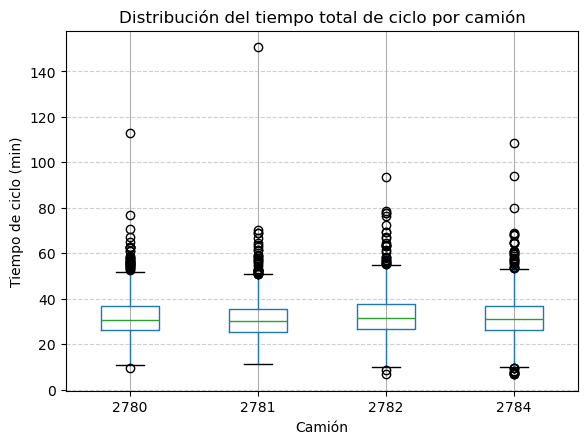

In [16]:
plt.figure(figsize=(10,6))
df.boxplot(column='CycleTime', by='Equipment')
plt.title('Distribución del tiempo total de ciclo por camión')
plt.suptitle('')
plt.xlabel('Camión')
plt.ylabel('Tiempo de ciclo (min)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


<Figure size 1000x600 with 0 Axes>

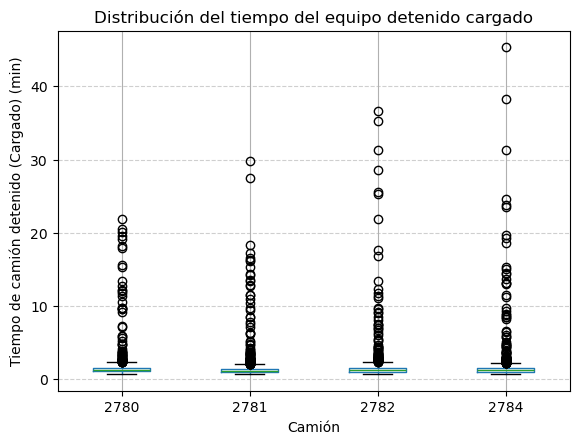

In [17]:
plt.figure(figsize=(10,6))
df.boxplot(column='LoadStopTime', by='Equipment')
plt.title('Distribución del tiempo del equipo detenido cargado')
plt.suptitle('')
plt.xlabel('Camión')
plt.ylabel('Tiempo de camión detenido (Cargado) (min)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<Figure size 1000x600 with 0 Axes>

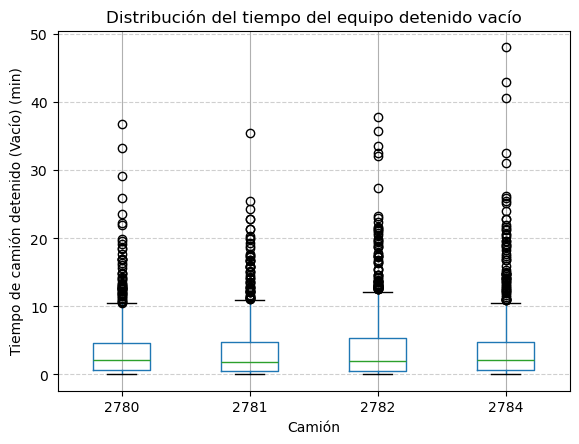

In [18]:
plt.figure(figsize=(10,6))
df.boxplot(column='EmptyStopTime', by='Equipment')
plt.title('Distribución del tiempo del equipo detenido vacío')
plt.suptitle('')
plt.xlabel('Camión')
plt.ylabel('Tiempo de camión detenido (Vacío) (min)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### **Estadisticas básicas descriptivas (Por turno)**

In [19]:
# Selección de variables del ciclo
cols_ciclo = ['CycleTime', 'EmptyTravelTime', 'EmptyStopTime',
              'LoadTime', 'LoadStopTime', 'LoadTravelTime']

# Promedios por camión y turno
ciclo_turno_camion = df.groupby(['Equipment','Shift'])[cols_ciclo].mean().round(2)
ciclo_turno_camion


CycleTime  EmptyTravelTime  EmptyStopTime  LoadTime  \
Equipment Shift                                                        
2780      Day        32.21            11.11           3.53      2.70   
          Night      32.75            10.91           3.53      2.58   
2781      Day        30.69            10.58           3.39      2.76   
          Night      32.70            11.40           3.53      2.69   
2782      Day        32.26            11.17           3.94      2.60   
          Night      34.11            11.66           4.04      2.73   
2784      Day        31.64            10.83           3.39      2.57   
          Night      33.30            11.20           4.08      2.47   

                 LoadStopTime  LoadTravelTime  
Equipment Shift                                
2780      Day            1.64           13.21  
          Night          1.90           13.80  
2781      Day            1.43           12.50  
          Night          1.85           13.21  
2782      Day            1.67           12.86  
          Night          1.93           13.73  
2784      Day            1.88           12.94  
          Night          1.75           13.78

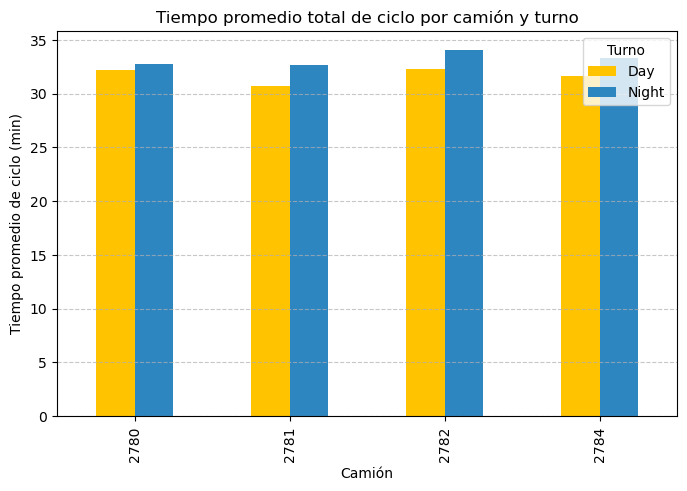

In [20]:
import matplotlib.pyplot as plt

df.groupby(['Equipment','Shift'])['CycleTime'].mean().unstack().plot(kind='bar', figsize=(8,5), color=['#FFC300','#2E86C1'])
plt.title('Tiempo promedio total de ciclo por camión y turno')
plt.xlabel('Camión')
plt.ylabel('Tiempo promedio de ciclo (min)')
plt.legend(title='Turno')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


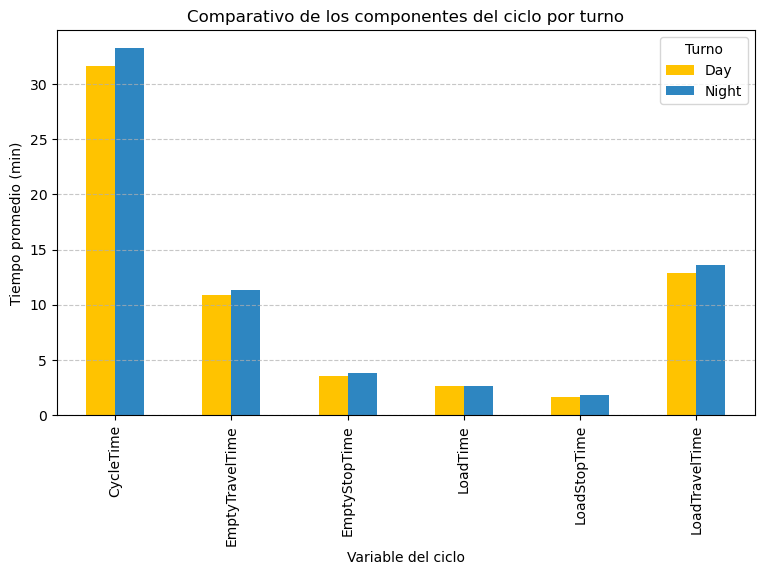

In [21]:
df.groupby('Shift')[cols_ciclo].mean().T.plot(kind='bar', figsize=(9,5), color=['#FFC300','#2E86C1'])
plt.title('Comparativo de los componentes del ciclo por turno')
plt.ylabel('Tiempo promedio (min)')
plt.xlabel('Variable del ciclo')
plt.legend(title='Turno')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


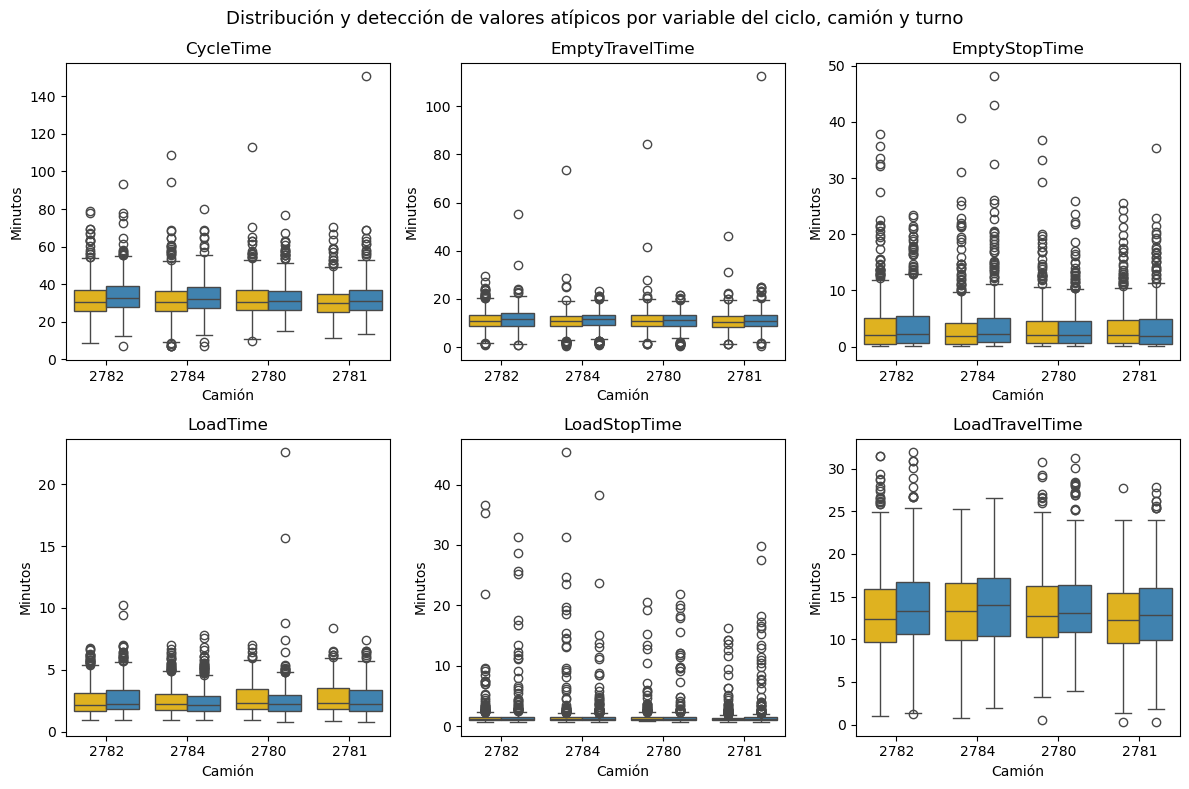

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_ciclo = ['CycleTime', 'EmptyTravelTime', 'EmptyStopTime',
              'LoadTime', 'LoadStopTime', 'LoadTravelTime']

plt.figure(figsize=(12,8))
for i, col in enumerate(cols_ciclo, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Equipment', y=col, hue='Shift', palette=['#FFC300','#2E86C1'])
    plt.title(col)
    plt.xlabel('Camión')
    plt.ylabel('Minutos')
    plt.legend().set_visible(False)
plt.suptitle('Distribución y detección de valores atípicos por variable del ciclo, camión y turno', fontsize=13)
plt.tight_layout()
plt.show()


In [23]:
# Detectar outliers por variable, camión y turno
outliers = []

for col in cols_ciclo:
    for (eq, sh), group in df.groupby(['Equipment', 'Shift']):
        Q1 = group[col].quantile(0.25)
        Q3 = group[col].quantile(0.75)
        IQR = Q3 - Q1
        high = Q3 + 1.5 * IQR
        low = Q1 - 1.5 * IQR
        count_out = group[(group[col] > high) | (group[col] < low)].shape[0]
        total = group.shape[0]
        outliers.append([eq, sh, col, count_out, total, round((count_out/total)*100, 2)])

outliers_df = pd.DataFrame(outliers, columns=['Equipment','Shift','Variable','Outliers','Total','Porcentaje_outliers'])
outliers_df



,Equipment,Shift,Variable,Outliers,Total,Porcentaje_outliers
0,2780,Day,CycleTime,16,373,4.29
1,2780,Night,CycleTime,19,346,5.49
2,2781,Day,CycleTime,14,497,2.82
3,2781,Night,CycleTime,12,401,2.99
4,2782,Day,CycleTime,17,489,3.48
5,2782,Night,CycleTime,14,386,3.63
6,2784,Day,CycleTime,25,455,5.49
7,2784,Night,CycleTime,10,401,2.49
8,2780,Day,EmptyTravelTime,11,373,2.95
9,2780,Night,EmptyTravelTime,18,346,5.20


##### **Creación de columna "CycleClass" y análisis**

In [24]:
# Crear la variable de clase del ciclo

# Si el ciclo es mayor a 30 minutos → Ineficiente, de lo contrario → Eficiente
df['CycleClass'] = df['CycleTime'].apply(lambda x: 'Ineficiente' if x > 30 else 'Eficiente')

# Contar proporciones
df['CycleClass'].value_counts(normalize=True).round(2) * 100


CycleClass
Ineficiente    55.0
Eficiente      45.0
Name: proportion, dtype: float64

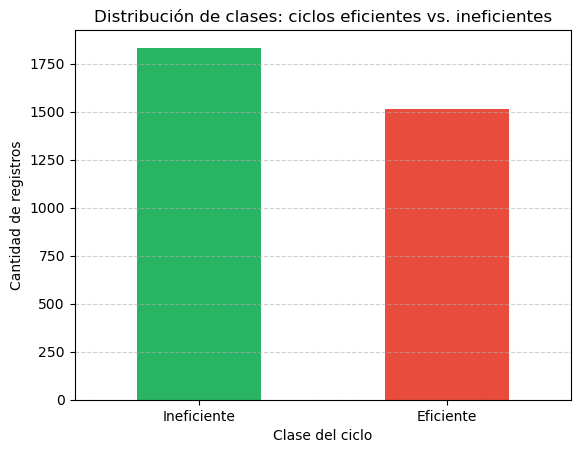

In [25]:
import matplotlib.pyplot as plt

df['CycleClass'].value_counts().plot(kind='bar', color=['#28B463','#E74C3C'])
plt.title('Distribución de clases: ciclos eficientes vs. ineficientes')
plt.ylabel('Cantidad de registros')
plt.xlabel('Clase del ciclo')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


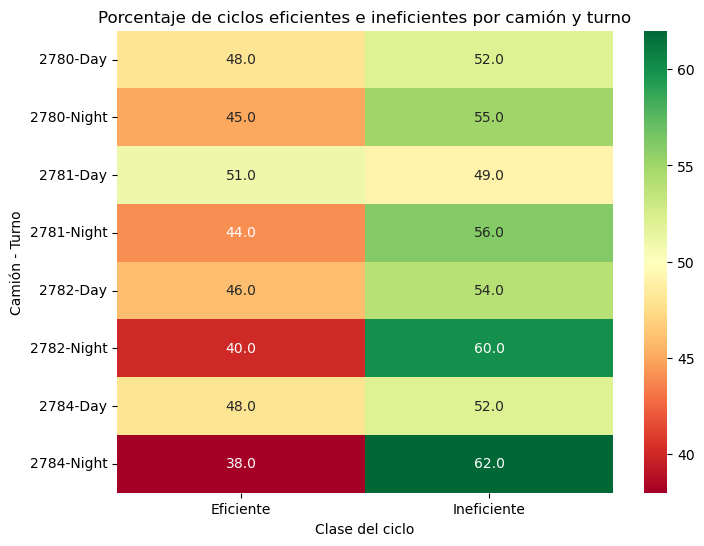

In [26]:
# Crear tabla cruzada de porcentajes por camión y turno
tabla_eficiencia = pd.crosstab(
    [df['Equipment'], df['Shift']],
    df['CycleClass'],
    normalize='index'
).round(2) * 100

# Graficar heatmap
plt.figure(figsize=(8,6))
sns.heatmap(tabla_eficiencia, annot=True, cmap='RdYlGn', fmt='.1f')
plt.title('Porcentaje de ciclos eficientes e ineficientes por camión y turno')
plt.ylabel('Camión - Turno')
plt.xlabel('Clase del ciclo')
plt.show()

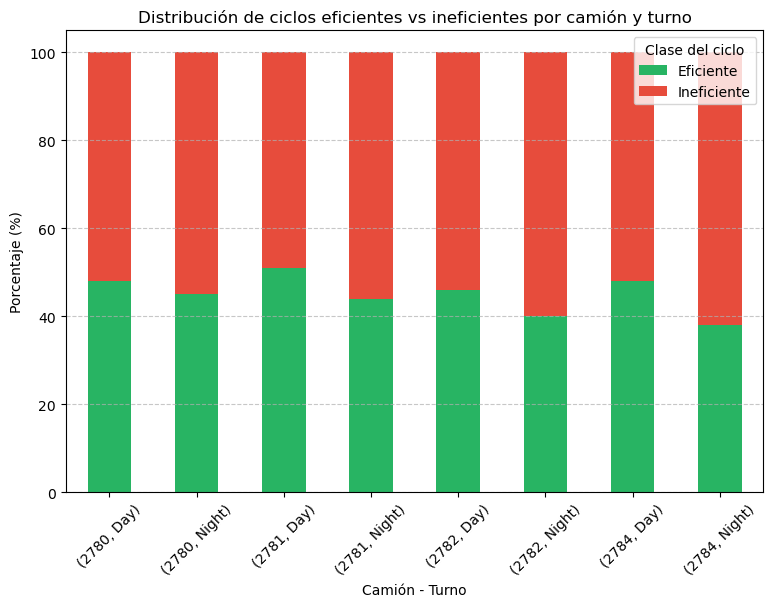

In [27]:
# Preparar datos
tabla_eficiencia = pd.crosstab(
    [df['Equipment'], df['Shift']],
    df['CycleClass'],
    normalize='index'
).round(2) * 100

# Graficar barras apiladas
tabla_eficiencia.plot(
    kind='bar',
    stacked=True,
    color=['#28B463','#E74C3C'],
    figsize=(9,6)
)
plt.title('Distribución de ciclos eficientes vs ineficientes por camión y turno')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Camión - Turno')
plt.xticks(rotation=45)
plt.legend(title='Clase del ciclo', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


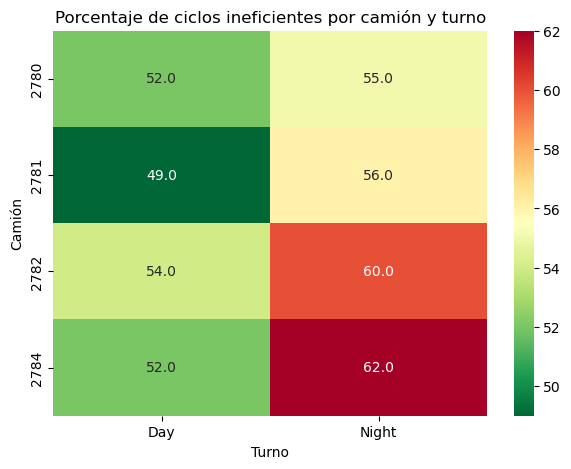

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear tabla cruzada con porcentaje de ciclos ineficientes por camión y turno
tabla_heat = pd.crosstab(
    df['Equipment'], df['Shift'],
    values=(df['CycleClass'] == 'Ineficiente'),
    aggfunc='mean'
).round(2) * 100  # porcentaje de ineficientes

# Graficar heatmap
plt.figure(figsize=(7,5))
sns.heatmap(tabla_heat, annot=True, cmap='RdYlGn_r', fmt='.1f')
plt.title('Porcentaje de ciclos ineficientes por camión y turno')
plt.xlabel('Turno')
plt.ylabel('Camión')
plt.show()


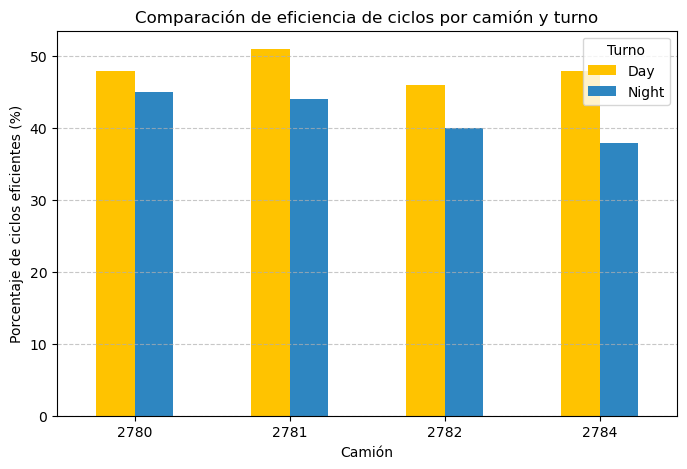

In [29]:
# Calcular porcentaje de eficiencia por camión y turno
tabla_bar = pd.crosstab(
    df['Equipment'], df['Shift'],
    values=(df['CycleClass'] == 'Eficiente'),
    aggfunc='mean'
).round(2) * 100  # porcentaje de ciclos eficientes

# Graficar barras agrupadas
tabla_bar.plot(kind='bar', figsize=(8,5), color=['#FFC300','#2E86C1'])
plt.title('Comparación de eficiencia de ciclos por camión y turno')
plt.ylabel('Porcentaje de ciclos eficientes (%)')
plt.xlabel('Camión')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Turno')
plt.show()


##### **Analisis de tiempos de equipos detenidos por turno**

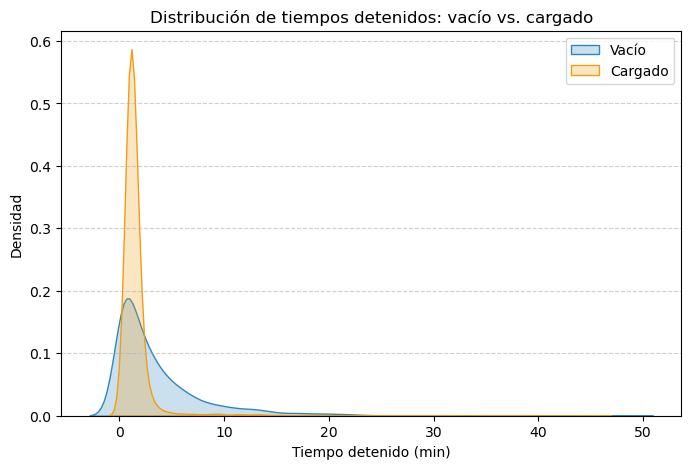

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.kdeplot(df['EmptyStopTime'], fill=True, color='#2E86C1', label='Vacío')
sns.kdeplot(df['LoadStopTime'], fill=True, color='#F39C12', label='Cargado')
plt.title('Distribución de tiempos detenidos: vacío vs. cargado')
plt.xlabel('Tiempo detenido (min)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

/var/folders/xl/kqb15tds0yq8fkgkclkv12x40000gn/T/ipykernel_4985/2653650524.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TipoDetencion', y='Tiempo', data=df_stops, palette=['#2E86C1','#F39C12'])


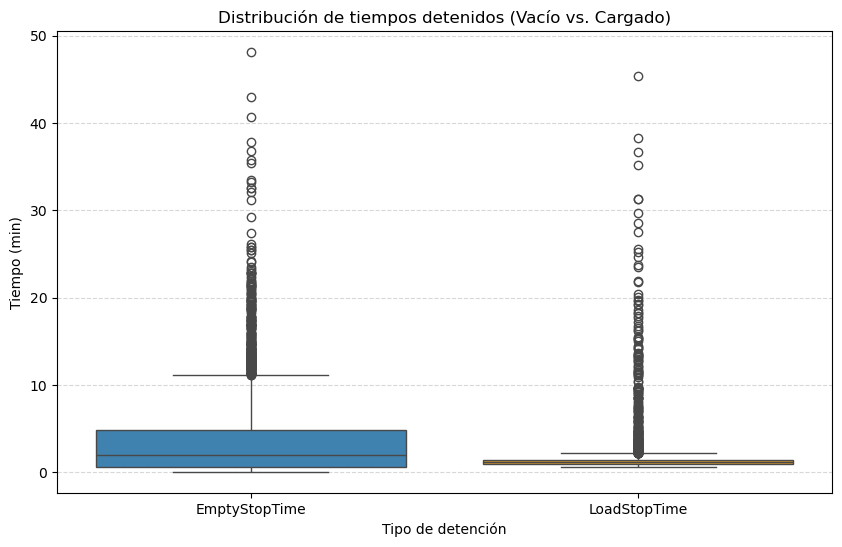

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos en formato largo
df_stops = df.melt(
    id_vars=['DateTime'],
    value_vars=['EmptyStopTime', 'LoadStopTime'],
    var_name='TipoDetencion',
    value_name='Tiempo'
)

# Graficar
plt.figure(figsize=(10,6))
sns.boxplot(x='TipoDetencion', y='Tiempo', data=df_stops, palette=['#2E86C1','#F39C12'])
plt.title('Distribución de tiempos detenidos (Vacío vs. Cargado)')
plt.xlabel('Tipo de detención')
plt.ylabel('Tiempo (min)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()





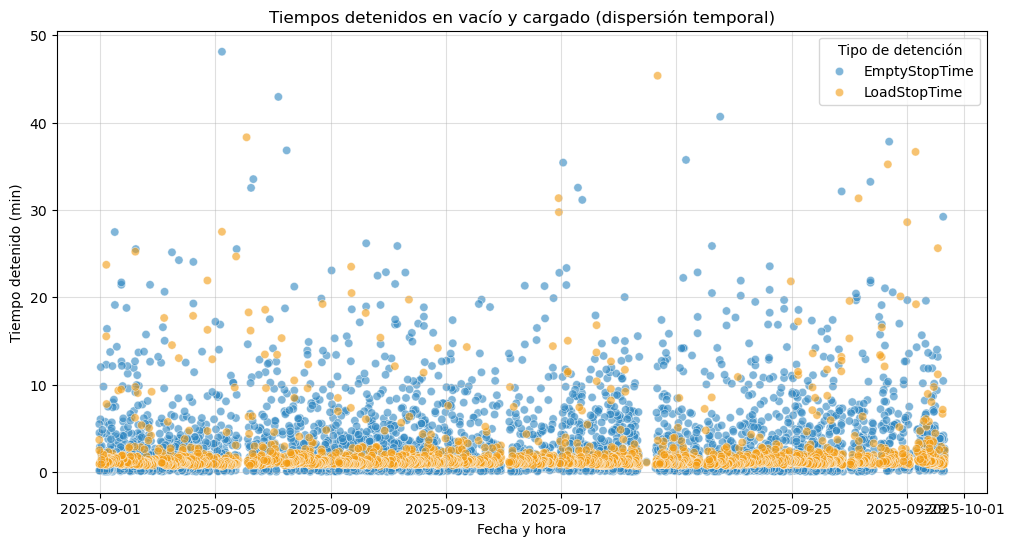

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Transformar a formato largo para graficar ambas series en un solo eje
df_stops = df.melt(
    id_vars=['DateTime'],
    value_vars=['EmptyStopTime', 'LoadStopTime'],
    var_name='TipoDetencion',
    value_name='Tiempo'
)

# Graficar
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_stops,
    x='DateTime',
    y='Tiempo',
    hue='TipoDetencion',
    palette=['#2E86C1','#F39C12'],
    alpha=0.6
)
plt.title('Tiempos detenidos en vacío y cargado (dispersión temporal)')
plt.xlabel('Fecha y hora')
plt.ylabel('Tiempo detenido (min)')
plt.legend(title='Tipo de detención')
plt.grid(alpha=0.4)
plt.show()



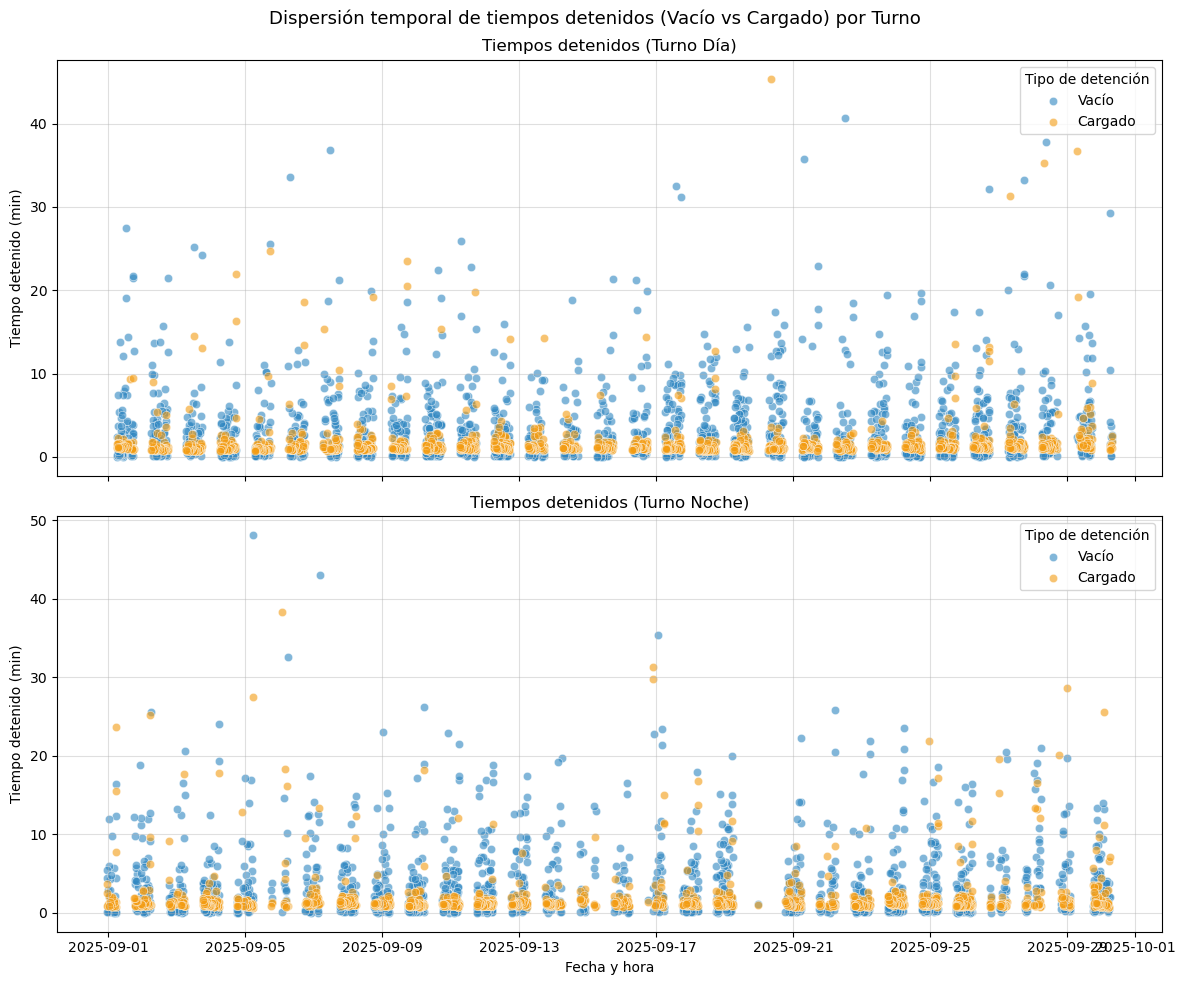

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura
fig, axes = plt.subplots(2, 1, figsize=(12,10), sharex=True)

# Gráfico 1: Turno Day 
sns.scatterplot(
    ax=axes[0],
    data=df[df['Shift'] == 'Day'],
    x='DateTime',
    y='EmptyStopTime',
    color='#2E86C1',
    alpha=0.6,
    label='Vacío'
)
sns.scatterplot(
    ax=axes[0],
    data=df[df['Shift'] == 'Day'],
    x='DateTime',
    y='LoadStopTime',
    color='#F39C12',
    alpha=0.6,
    label='Cargado'
)
axes[0].set_title('Tiempos detenidos (Turno Día)')
axes[0].set_ylabel('Tiempo detenido (min)')
axes[0].legend(title='Tipo de detención')
axes[0].grid(alpha=0.4)

# Gráfico 2: Turno Night 
sns.scatterplot(
    ax=axes[1],
    data=df[df['Shift'] == 'Night'],
    x='DateTime',
    y='EmptyStopTime',
    color='#2E86C1',
    alpha=0.6,
    label='Vacío'
)
sns.scatterplot(
    ax=axes[1],
    data=df[df['Shift'] == 'Night'],
    x='DateTime',
    y='LoadStopTime',
    color='#F39C12',
    alpha=0.6,
    label='Cargado'
)
axes[1].set_title('Tiempos detenidos (Turno Noche)')
axes[1].set_ylabel('Tiempo detenido (min)')
axes[1].set_xlabel('Fecha y hora')
axes[1].legend(title='Tipo de detención')
axes[1].grid(alpha=0.4)

plt.suptitle('Dispersión temporal de tiempos detenidos (Vacío vs Cargado) por Turno', fontsize=13)
plt.tight_layout()
plt.show()


##### **Análisis de correlación**

📊 Matriz de correlación de variables numéricas:



,Payload,FuelBurned,CycleTime,DistanceTravelled,EmptyTravelTime,EmptyStopTime,LoadTime,LoadStopTime,LoadTravelTime,LoadTravelDistance
Payload,1.00,-0.00,-0.00,-0.10,0.01,-0.01,0.07,-0.06,0.01,-0.15
FuelBurned,-0.00,1.00,0.03,0.02,0.04,0.01,-0.01,0.00,0.01,0.01
CycleTime,-0.00,0.03,1.00,0.68,0.70,0.60,0.13,0.36,0.59,0.48
DistanceTravelled,-0.10,0.02,0.68,1.00,0.81,0.09,-0.12,0.04,0.56,0.69
EmptyTravelTime,0.01,0.04,0.70,0.81,1.00,0.23,-0.05,0.02,0.26,0.25
EmptyStopTime,-0.01,0.01,0.60,0.09,0.23,1.00,0.10,0.03,-0.03,-0.05
LoadTime,0.07,-0.01,0.13,-0.12,-0.05,0.10,1.00,0.01,-0.07,-0.15
LoadStopTime,-0.06,0.00,0.36,0.04,0.02,0.03,0.01,1.00,0.13,0.06
LoadTravelTime,0.01,0.01,0.59,0.56,0.26,-0.03,-0.07,0.13,1.00,0.86
LoadTravelDistance,-0.15,0.01,0.48,0.69,0.25,-0.05,-0.15,0.06,0.86,1.00


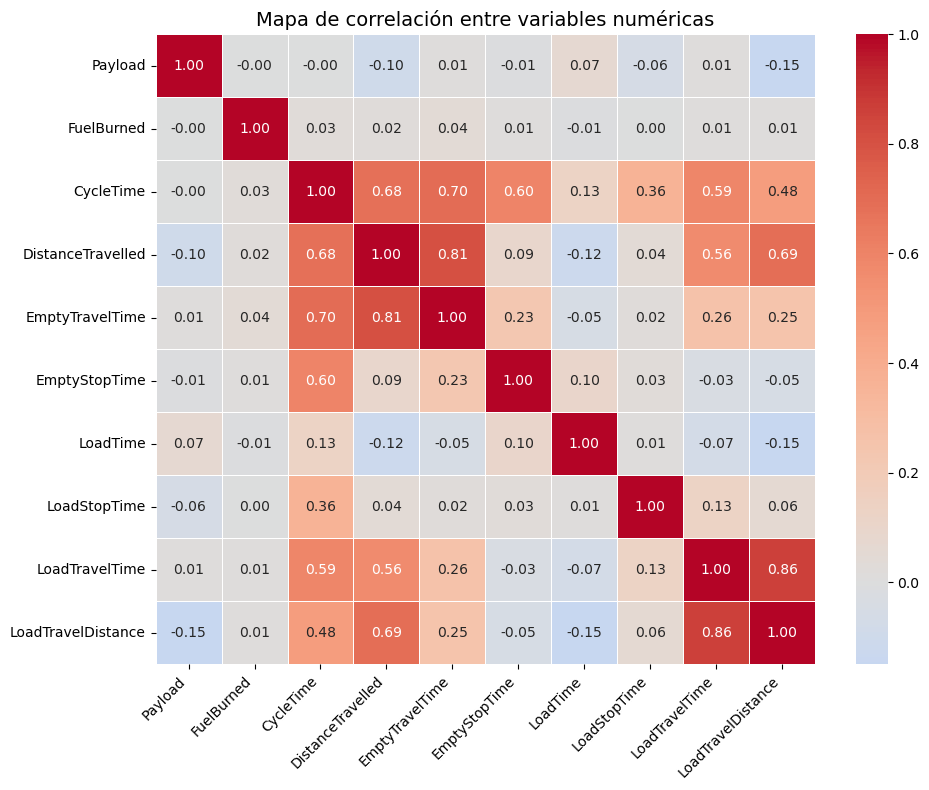

In [34]:
# Seleccionar solo las variables numéricas
numericas = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = numericas.corr().round(2)

# Mostrar la matriz
print("📊 Matriz de correlación de variables numéricas:\n")
display(corr_matrix)

# Visualizar el mapa de calor (heatmap)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    linewidths=0.5
)
plt.title('Mapa de correlación entre variables numéricas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
